In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
from keras.layers import concatenate
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization,LeakyReLU

(224, 224, 3)

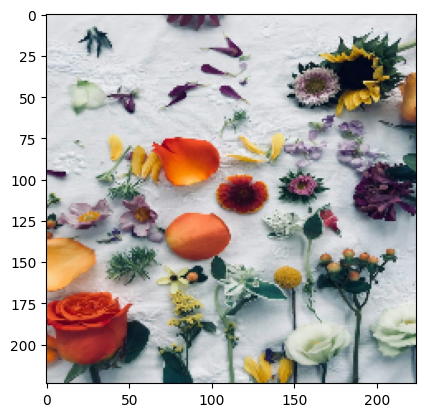

In [2]:
ImagePath="./Train/"
img_file = ImagePath + "image 1.jpeg"
img=cv2.imread(img_file)

img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))

plt.imshow(img)
img.shape

In [3]:
HEIGHT=224
WIDTH=224
ImagePath="./Train/"

def ExtractInput(path):
    X_img=[]
    y_img=[]
    for imageDir in os.listdir(ImagePath):
        try:
            img = cv2.imread(ImagePath + imageDir)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
            img = img.astype(np.float32)
            img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    
            img_lab_rs = cv2.resize(img_lab, (WIDTH, HEIGHT)) 
            img_l = img_lab_rs[:,:,0] 
            
            img_ab = img_lab_rs[:,:,1:]
            img_ab = img_ab/128
            
            print(imageDir)

            X_img.append(img_l)
            y_img.append(img_ab)
        except:
            pass
    X_img = np.array(X_img)
    y_img = np.array(y_img)
    
    return X_img,y_img

In [4]:
X_,y_ = ExtractInput(ImagePath) # Data-preprocessing

image 1.jpeg
image 10.jpeg
image 11.jpeg
image 12.jpeg
image 13.jpeg
image 14.jpeg
image 15.jpeg
image 16.jpeg
image 17.jpeg
image 18.jpeg
image 19.jpeg
image 2.jpeg
image 20.jpeg
image 26.jpeg
image 27.jpeg
image 3.jpeg
image 4.jpeg
image 5.jpeg
image 6.jpeg
image 7.jpeg
image 8.jpeg
image 9.jpeg
photo-1433162653888-a571db5ccccf.jpg
photo-1458571037713-913d8b481dc6.jpg
photo-1459255418679-d6424da9ee33.jpg
photo-1461800919507-79b16743b257.jpg
photo-1461896836934-ffe607ba8211.jpg
photo-1464695110811-dcf3903dc2f4.jpg
photo-1470058869958-2a77ade41c02.jpg
photo-1471086569966-db3eebc25a59.jpg
photo-1471897488648-5eae4ac6686b (1).jpg
photo-1471897488648-5eae4ac6686b.jpg
photo-1471899236350-e3016bf1e69e.jpg
photo-1485470733090-0aae1788d5af.jpg
photo-1485550409059-9afb054cada4.jpg
photo-1488900128323-21503983a07e.jpg
photo-1496449903678-68ddcb189a24.jpg
photo-1497034825429-c343d7c6a68f.jpg
photo-1497215728101-856f4ea42174.jpg
photo-1497912300441-f9ab6a41008b.jpg
photo-1499195333224-3ce974eecb4

In [5]:
K.clear_session()
def InstantiateModel(in_):
    model_ = Conv2D(16,(3,3),padding='same',strides=1)(in_)
    model_ = LeakyReLU()(model_)
   
    model_ = Conv2D(32,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    model_ = MaxPooling2D(pool_size=(2,2),padding='same')(model_)
    
    model_ = Conv2D(64,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    model_ = MaxPooling2D(pool_size=(2,2),padding='same')(model_)
    
    model_ = Conv2D(128,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2D(256,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = UpSampling2D((2, 2))(model_)
    model_ = Conv2D(128,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = UpSampling2D((2, 2))(model_)
    model_ = Conv2D(64,(3,3), padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
   
    
    concat_ = concatenate([model_, in_]) 
    
    model_ = Conv2D(64,(3,3), padding='same',strides=1)(concat_)
    model_ = LeakyReLU()(model_)
    model_ = BatchNormalization()(model_)
    
    model_ = Conv2D(32,(3,3),padding='same',strides=1)(model_)
    model_ = LeakyReLU()(model_)
 
    
    model_ = Conv2D(2,(3,3), activation='tanh',padding='same',strides=1)(model_)

    return model_

In [6]:
Input_Sample = Input(shape=(HEIGHT, WIDTH,1))
Output_ = InstantiateModel(Input_Sample)
Model_Colourization = Model(inputs=Input_Sample, outputs=Output_)

In [7]:
LEARNING_RATE = 0.001
Model_Colourization.compile(tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                            loss='mean_squared_error')
Model_Colourization.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 224, 224,  │          0 │ conv2d[0][0]      │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 224, 224,  │      4,640 │ leaky_re_lu[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 224, 224,  │          0 │ conv2d_1[0][0]    │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 224, 224,  │        128 │ leaky_re_lu_1[0]… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 112, 112,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 112, 112,  │          0 │ conv2d_2[0][0]    │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ leaky_re_lu_2[0]… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 56, 56,    │          0 │ conv2d_3[0][0]    │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ leaky_re_lu_3[0]… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │    295,168 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 56, 56,    │          0 │ conv2d_4[0][0]    │
│ (LeakyReLU)         │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │      1,024 │ leaky_re_lu_4[0]

 Total params: 820,386 (3.13 MB)

 Trainable params: 819,042 (3.12 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [8]:
def GenerateInputs(X_,y_):
    num_iterations = 53*2
    num_images = 53*2
    X_ = np.random.rand(num_images,224,224,1)
    y_ = np.random.rand(num_images,224,224,2)
    while True:
        for i in range(num_iterations):
            X_input = X_[i].reshape(1,224,224,1)
            y_input = y_[i].reshape(1,224,224,2)
            yield (X_input,y_input)


In [9]:
start = pd.Timestamp.now()
Model_Colourization.fit(GenerateInputs(X_,y_),epochs=100,verbose=1,steps_per_epoch=100,shuffle=True)
time_taken = pd.Timestamp.now() - start
print(time_taken)

Epoch 1/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - loss: 0.2093
Epoch 2/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - loss: 0.0929
Epoch 3/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - loss: 0.0898
Epoch 4/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - loss: 0.0900
Epoch 5/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - loss: 0.0892
Epoch 6/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - loss: 0.0888
Epoch 7/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - loss: 0.0883
Epoch 8/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - loss: 0.0879
Epoch 9/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 1549s 30s/step - loss: 0.0881
Epoch 10/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - loss: 0.0880
Epoch 11/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - loss: 0.0883
Epoch 12/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - loss: 0.0879
Epoch 13/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - loss: 0.0881
Epoch 14/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - loss: 0.0873
Epoch 15/53
53/53 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - loss: 0.0887
Epoch 16/53
53/5

In [15]:
import os

def ExtractTestInput(ImagePath):

    if not os.path.exists(ImagePath):
        raise FileNotFoundError(f"The file {ImagePath} does not exist.")

    img = cv2.imread(ImagePath)
   
    if img is None:
        raise FileNotFoundError(f"The file {ImagePath} does not exist.")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_= cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img_ = cv2.cvtColor(img_, cv2.COLOR_RGB2Lab)
    img_=img_.astype(np.float32)
    img_lab_rs = cv2.resize(img_, (WIDTH, HEIGHT)) 
    img_l = img_lab_rs[:,:,0] 
    img_l_reshaped = img_l.reshape(1,224,224,1)
    
    return img_l_reshaped

In [16]:
Test_Image_path="./Test/"
file_name =  'image 7.jpeg'
ImagePath=Test_Image_path +file_name
image_for_test = ExtractTestInput(ImagePath)
Prediction = Model_Colourization.predict(image_for_test)
Prediction = Prediction*128
Prediction=Prediction.reshape(224,224,2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


saved


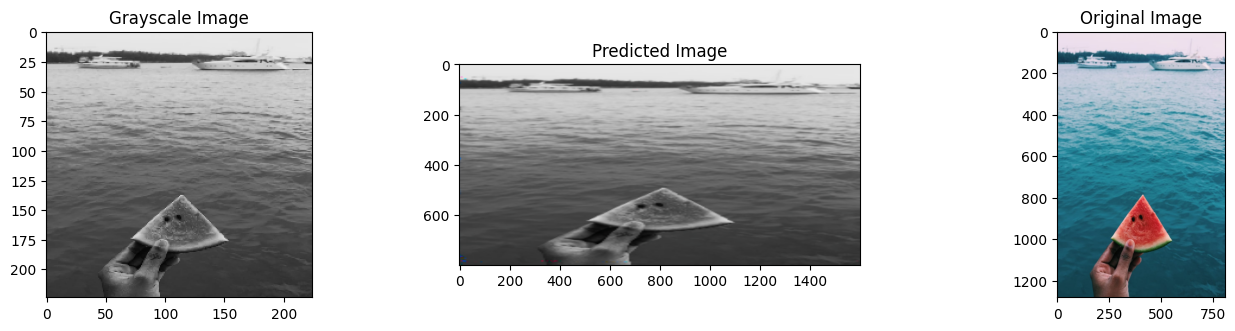

In [17]:
plt.figure(figsize=(30,20))
plt.subplot(5,5,1)
img=cv2.imread(ImagePath)
img_1=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img_1,cv2.COLOR_RGB2GRAY)
img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
img=cv2.resize(img,(224,224))
plt.title("Grayscale Image")
plt.imshow(img)

plt.subplot(5,5,1+1)
img_=cv2.cvtColor(img,cv2.COLOR_RGB2Lab)
img_[:,:,1:]=Prediction
img_=cv2.cvtColor(img_,cv2.COLOR_Lab2RGB)
img_=cv2.resize(img_,(1600,800))
plt.title("Predicted Image")
plt.imshow(img_)
plt.savefig(f"pred_{file_name}.jpeg")
print('saved')

plt.subplot(5,5,1+2)
plt.title("Original Image")
plt.imshow(img_1)

image 7.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
saved
timage 1.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step
saved


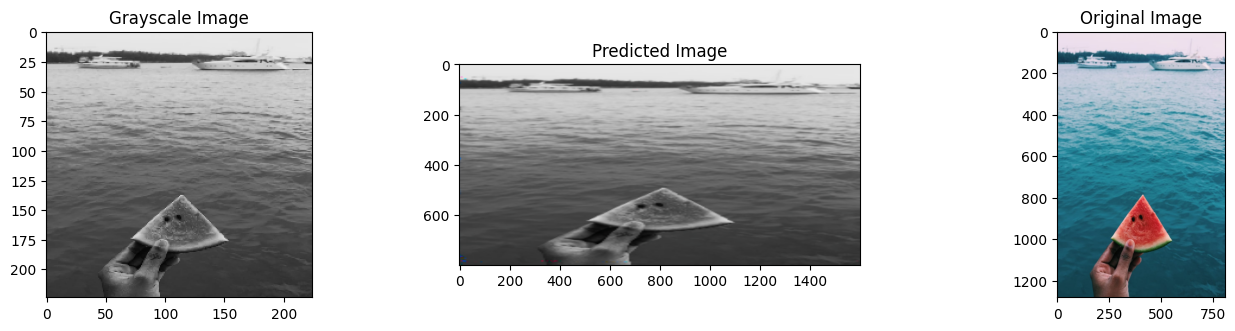

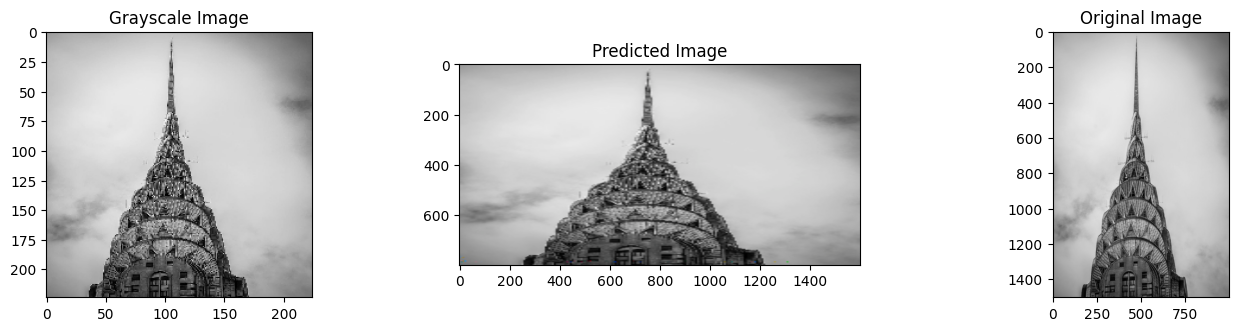

In [18]:
Test_Image_path="./Test/"
for file_name in os.listdir(Test_Image_path):
    try:
        print(file_name)
        ImagePath=Test_Image_path +file_name
        image_for_test = ExtractTestInput(ImagePath)
        Prediction = Model_Colourization.predict(image_for_test)
        Prediction = Prediction*128
        Prediction=Prediction.reshape(224,224,2)

        plt.figure(figsize=(30,20))
        plt.subplot(5,5,1)
        img=cv2.imread(ImagePath)
        img_1=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.cvtColor(img_1,cv2.COLOR_RGB2GRAY)
        img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        img=cv2.resize(img,(224,224))
        plt.title("Grayscale Image")
        plt.imshow(img)

        plt.subplot(5,5,1+1)
        img_=cv2.cvtColor(img,cv2.COLOR_RGB2Lab)
        img_[:,:,1:]=Prediction
        img_=cv2.cvtColor(img_,cv2.COLOR_Lab2RGB)
        img_=cv2.resize(img_,(1600,800))
        plt.title("Predicted Image")
        plt.imshow(img_)
        plt.savefig(f"./output/pred_{file_name}.jpeg")
        print('saved')

        plt.subplot(5,5,1+2)
        plt.title("Original Image")
        plt.imshow(img_1)
    except:
        pass

